# Ariane particle tracks  in Barrow Strait

date notebook created: 2019-03-08

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.cm as cm
import numpy.ma as ma
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Directory contains experiments designed to answer RQ2B: Is there evidence for flow reversal in Barrow Strait bottom waters, implying westward flux of Baffin Bay waters.

Operate: Forward
- run1 --- 2015-01-05 to 2016-01-05
- run2 --- 2015-04-05 to 2016-04-05
- run3 --- 2015-08-05 to 2016-08-05

In [3]:
run1 = nc.Dataset('/ocean/brogalla/GEOTRACES/Ariane/flow_reversal_Barrow_Strait/trajecs_run1.nc')
run2 = nc.Dataset('/ocean/brogalla/GEOTRACES/Ariane/flow_reversal_Barrow_Strait/trajecs_run2.nc')
run3 = nc.Dataset('/ocean/brogalla/GEOTRACES/Ariane/flow_reversal_Barrow_Strait/trajecs_run3.nc')

In [4]:
initx_run1 = run1.variables['init_x']
inity_run1 = run1.variables['init_y']
initz_run1 = run1.variables['init_z']
lon_run1 = run1.variables['traj_lon']
lat_run1 = run1.variables['traj_lat']
depth_run1 = run1.variables['traj_depth']
    
initx_run1 = np.array(initx_run1)
inity_run1 = np.array(inity_run1)
initz_run1 = np.array(initz_run1)
lon_run1 = np.array(lon_run1)   
lat_run1 = np.array(lat_run1)
depth_run1 = np.array(depth_run1)

In [5]:
initx_run2 = run2.variables['init_x']
inity_run2 = run2.variables['init_y']
initz_run2 = run2.variables['init_z']
lon_run2 = run2.variables['traj_lon']
lat_run2 = run2.variables['traj_lat']
depth_run2 = run2.variables['traj_depth']
    
initx_run2 = np.array(initx_run2)
inity_run2 = np.array(inity_run2)
initz_run2 = np.array(initz_run2)
lon_run2 = np.array(lon_run2)   
lat_run2 = np.array(lat_run2)
depth_run2 = np.array(depth_run2)

In [6]:
initx_run3 = run3.variables['init_x']
inity_run3 = run3.variables['init_y']
initz_run3 = run3.variables['init_z']
lon_run3 = run3.variables['traj_lon']
lat_run3 = run3.variables['traj_lat']
depth_run3 = run3.variables['traj_depth']
    
initx_run3 = np.array(initx_run3)
inity_run3 = np.array(inity_run3)
initz_run3 = np.array(initz_run3)
lon_run3 = np.array(lon_run3)   
lat_run3 = np.array(lat_run3)
depth_run3 = np.array(depth_run3)

Released at depths ranging from level 20-33.

# Run 1 --- 2015-01 to 2016-01

Text(0.5,1,'Run1 particle tracks')

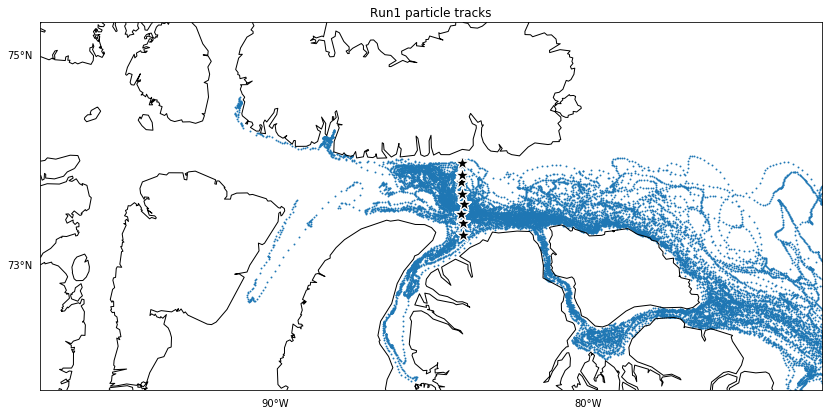

In [24]:
fig = plt.figure(figsize=(14,8))
ax1 = plt.subplot2grid((1, 1), (0, 0))

proj1=Basemap(projection='eqdc',lat_0 = 74, lon_0 = -85, resolution='i', width=0.85e6, height=0.40e6, ax=ax1)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
proj1.drawcoastlines()

x_ini, y_ini = proj1(lon_run1[0],lat_run1[0])
x, y = proj1(lon_run1, lat_run1)
ax1.scatter(x, y, s=0.8)
ax1.scatter(x_ini,y_ini, s=200, zorder=6, marker='*', c='k', edgecolors='white')

ax1.set_title('Run1 particle tracks')

##### Group based on depth from bottom 

In [7]:
bottom_depths = [30, 31, 33, 33, 33, 33, 33, 32]

In [8]:
group_depth = np.zeros(initz_run1.shape)
# -1 --- not interested in
# 0 --- at the bottom
# 1 --- one above the bottom etc.


for i in range(0,len(initz_run1)):
    if (initz_run1[i] == bottom_depths[0] and i<13):
        group_depth[i] = 0
    elif (initz_run1[i] == bottom_depths[1] and 13<i<26):
        group_depth[i] = 0
    elif (initz_run1[i] == bottom_depths[2] and 26<i<90):
        group_depth[i] = 0
    elif (initz_run1[i] == bottom_depths[-1] and 93<i<104):
        group_depth[i] = 0
    elif (initz_run1[i] == bottom_depths[0]-1 and i<13) or (initz_run1[i] == bottom_depths[1]-1 and 13<i<26) or \
    (initz_run1[i] == bottom_depths[2]-1 and 26<i<90) or (initz_run1[i] == bottom_depths[-1]-1 and 93<i<104):
        group_depth[i] = 1
    elif (initz_run1[i] == bottom_depths[0]-2 and i<13) or (initz_run1[i] == bottom_depths[1]-2 and 13<i<26) or \
    (initz_run1[i] == bottom_depths[2]-2 and 26<i<90) or (initz_run1[i] == bottom_depths[-1]-2 and 93<i<104):
        group_depth[i] = 2
    else:
        group_depth[i] = -1

### Bottom:

In [10]:
colors = ['#764565','#3F427F', '#9BA9D1', '#86CAC9', '#e8b85b', '#BBDD7A', '#A0AF77']

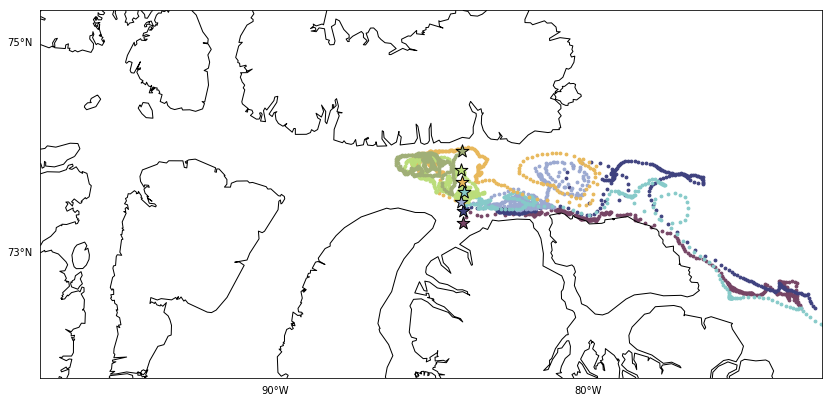

In [76]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

proj1=Basemap(projection='eqdc',lat_0 = 74, lon_0 = -85, resolution='i', width=0.85e6, height=0.40e6, ax=ax)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
proj1.drawcoastlines()

lon1 = lon_run1[:, group_depth == 0]
lat1 = lat_run1[:, group_depth == 0]
    
for run in range(0,7): 
    lon = lon1[:,run]
    lat = lat1[:,run]
    x, y = proj1(lon, lat)
    x_ini, y_ini = proj1(lon[0],lat[0])
    
    ax.scatter(x, y, s=8, color=colors[run])
    ax.scatter(x_ini,y_ini, s=180, zorder=6, marker='*', c=colors[run], edgecolors='k')

### Just above the bottom:

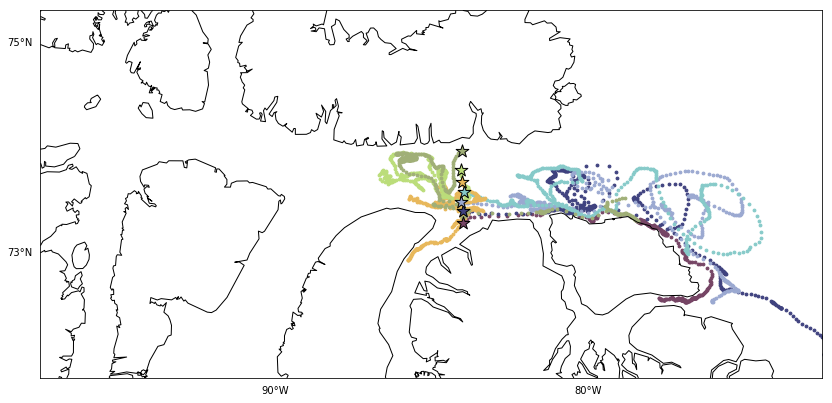

In [77]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

proj1=Basemap(projection='eqdc',lat_0 = 74, lon_0 = -85, resolution='i', width=0.85e6, height=0.40e6, ax=ax)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
proj1.drawcoastlines()

lon1 = lon_run1[:, group_depth == 1]
lat1 = lat_run1[:, group_depth == 1]
    
for run in range(0,7): 
    lon = lon1[:,run]
    lat = lat1[:,run]
    x, y = proj1(lon, lat)
    x_ini, y_ini = proj1(lon[0],lat[0])
    
    ax.scatter(x, y, s=8, color=colors[run])
    ax.scatter(x_ini,y_ini, s=180, zorder=8, marker='*', c=colors[run], edgecolors='k')

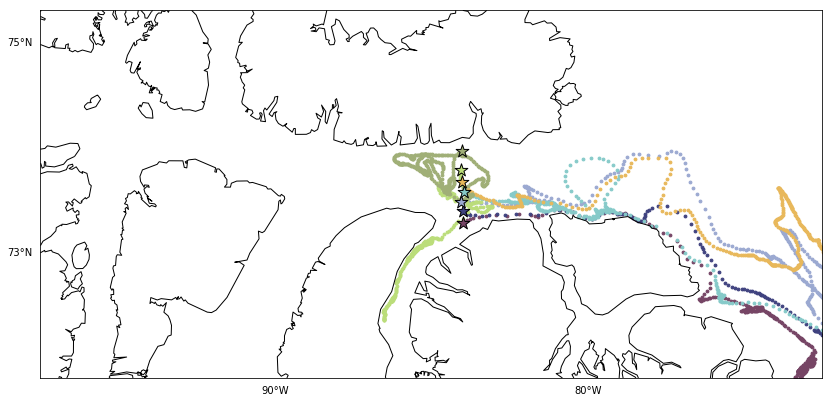

In [78]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

proj1=Basemap(projection='eqdc',lat_0 = 74, lon_0 = -85, resolution='i', width=0.85e6, height=0.40e6, ax=ax)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
proj1.drawcoastlines()

lon1 = lon_run1[:, group_depth == 2]
lat1 = lat_run1[:, group_depth == 2]
    
for run in range(0,7): 
    lon = lon1[:,run]
    lat = lat1[:,run]
    x, y = proj1(lon, lat)
    x_ini, y_ini = proj1(lon[0],lat[0])
    
    ax.scatter(x, y, s=8, color=colors[run])
    ax.scatter(x_ini,y_ini, s=180, zorder=8, marker='*', c=colors[run], edgecolors='k')

# Run 2:

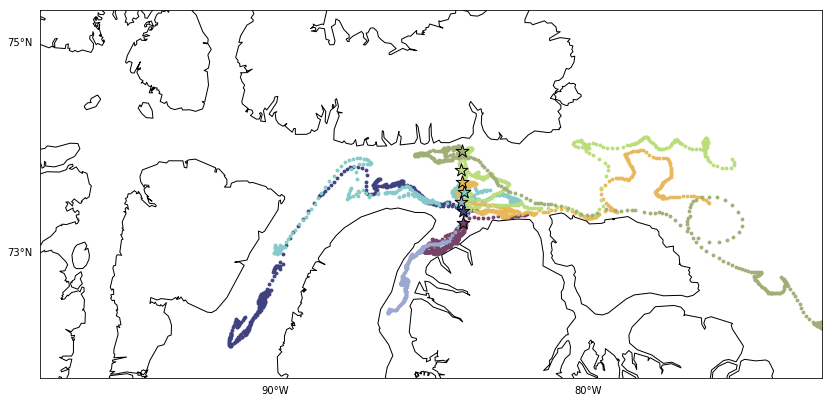

In [11]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

proj1=Basemap(projection='eqdc',lat_0 = 74, lon_0 = -85, resolution='i', width=0.85e6, height=0.40e6, ax=ax)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
proj1.drawcoastlines()

lon1 = lon_run2[:, group_depth == 0]
lat1 = lat_run2[:, group_depth == 0]
    
for run in range(0,7): 
    lon = lon1[:,run]
    lat = lat1[:,run]
    x, y = proj1(lon, lat)
    x_ini, y_ini = proj1(lon[0],lat[0])
    
    ax.scatter(x, y, s=8, color=colors[run])
    ax.scatter(x_ini,y_ini, s=180, zorder=8, marker='*', c=colors[run], edgecolors='k')

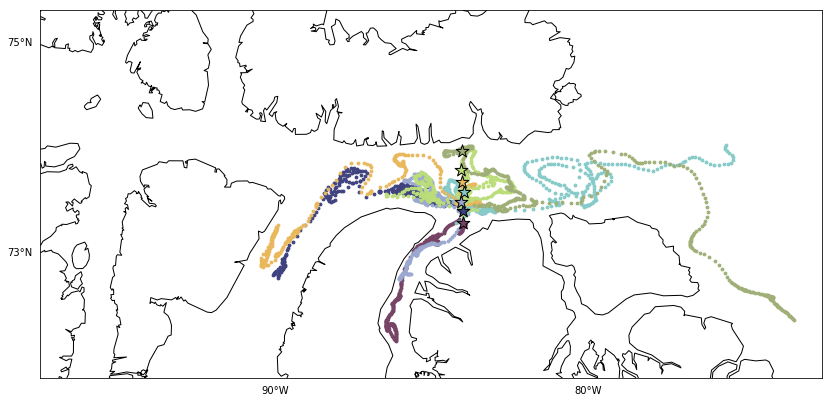

In [12]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

proj1=Basemap(projection='eqdc',lat_0 = 74, lon_0 = -85, resolution='i', width=0.85e6, height=0.40e6, ax=ax)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
proj1.drawcoastlines()

lon1 = lon_run2[:, group_depth == 1]
lat1 = lat_run2[:, group_depth == 1]
    
for run in range(0,7): 
    lon = lon1[:,run]
    lat = lat1[:,run]
    x, y = proj1(lon, lat)
    x_ini, y_ini = proj1(lon[0],lat[0])
    
    ax.scatter(x, y, s=8, color=colors[run])
    ax.scatter(x_ini,y_ini, s=180, zorder=8, marker='*', c=colors[run], edgecolors='k')

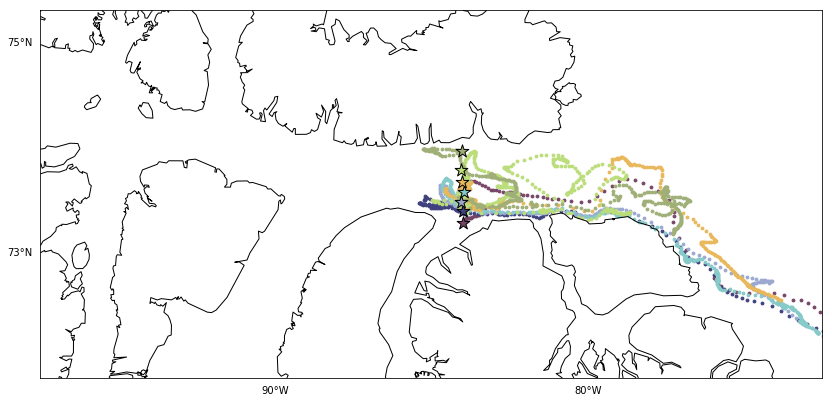

In [13]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

proj1=Basemap(projection='eqdc',lat_0 = 74, lon_0 = -85, resolution='i', width=0.85e6, height=0.40e6, ax=ax)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
proj1.drawcoastlines()

lon1 = lon_run2[:, group_depth == 2]
lat1 = lat_run2[:, group_depth == 2]
    
for run in range(0,7): 
    lon = lon1[:,run]
    lat = lat1[:,run]
    x, y = proj1(lon, lat)
    x_ini, y_ini = proj1(lon[0],lat[0])
    
    ax.scatter(x, y, s=8, color=colors[run])
    ax.scatter(x_ini,y_ini, s=180, zorder=8, marker='*', c=colors[run], edgecolors='k')

# Run 3:

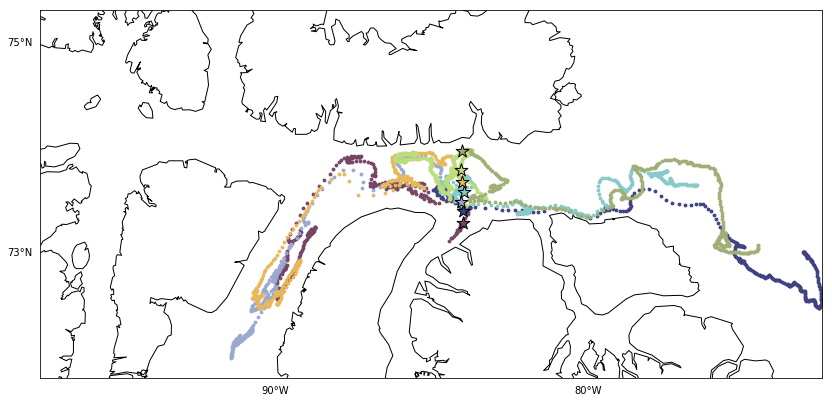

In [14]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

proj1=Basemap(projection='eqdc',lat_0 = 74, lon_0 = -85, resolution='i', width=0.85e6, height=0.40e6, ax=ax)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
proj1.drawcoastlines()

lon1 = lon_run3[:, group_depth == 0]
lat1 = lat_run3[:, group_depth == 0]
    
for run in range(0,7): 
    lon = lon1[:,run]
    lat = lat1[:,run]
    x, y = proj1(lon, lat)
    x_ini, y_ini = proj1(lon[0],lat[0])
    
    ax.scatter(x, y, s=8, color=colors[run])
    ax.scatter(x_ini,y_ini, s=180, zorder=8, marker='*', c=colors[run], edgecolors='k')

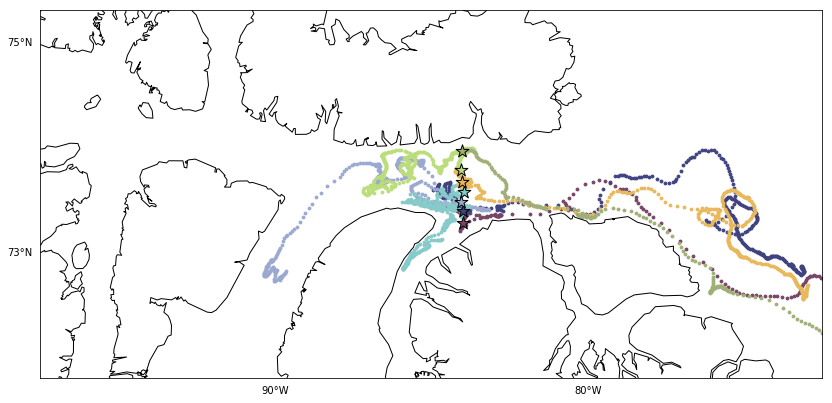

In [15]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

proj1=Basemap(projection='eqdc',lat_0 = 74, lon_0 = -85, resolution='i', width=0.85e6, height=0.40e6, ax=ax)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
proj1.drawcoastlines()

lon1 = lon_run3[:, group_depth == 1]
lat1 = lat_run3[:, group_depth == 1]
    
for run in range(0,7): 
    lon = lon1[:,run]
    lat = lat1[:,run]
    x, y = proj1(lon, lat)
    x_ini, y_ini = proj1(lon[0],lat[0])
    
    ax.scatter(x, y, s=8, color=colors[run])
    ax.scatter(x_ini,y_ini, s=180, zorder=8, marker='*', c=colors[run], edgecolors='k')

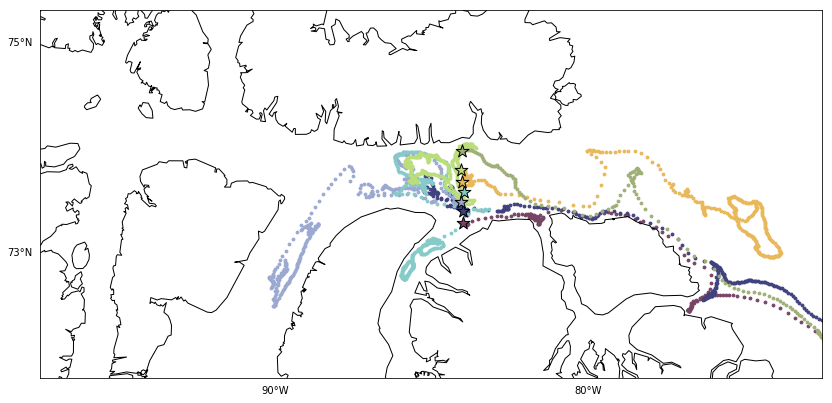

In [16]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

proj1=Basemap(projection='eqdc',lat_0 = 74, lon_0 = -85, resolution='i', width=0.85e6, height=0.40e6, ax=ax)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
proj1.drawcoastlines()

lon1 = lon_run3[:, group_depth == 2]
lat1 = lat_run3[:, group_depth == 2]
    
for run in range(0,7): 
    lon = lon1[:,run]
    lat = lat1[:,run]
    x, y = proj1(lon, lat)
    x_ini, y_ini = proj1(lon[0],lat[0])
    
    ax.scatter(x, y, s=8, color=colors[run])
    ax.scatter(x_ini,y_ini, s=180, zorder=8, marker='*', c=colors[run], edgecolors='k')